In [503]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

In [504]:
data = pd.read_csv('housingPr.csv')

In [505]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [506]:
data.shape

(20640, 10)

In [507]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [508]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data['total_bedrooms'] = imputer.fit_transform(data[['total_bedrooms']])

In [509]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [510]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [511]:
X = data.drop(columns=['median_house_value'], axis=1)
y = data['median_house_value']

In [512]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [513]:
train_data = X_train.join(y_train)

In [514]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13167,-121.37,36.83,14.0,3658.0,612.0,1951.0,600.0,4.7600,INLAND,216000.0
1758,-122.33,37.94,45.0,1226.0,279.0,590.0,260.0,2.8833,NEAR BAY,140400.0
10499,-117.67,33.51,19.0,1258.0,246.0,545.0,227.0,2.9762,<1H OCEAN,184400.0
13241,-117.66,34.13,19.0,3995.0,554.0,1523.0,509.0,6.0750,INLAND,254100.0
14324,-117.15,32.72,52.0,344.0,177.0,460.0,147.0,1.2292,NEAR OCEAN,137500.0
...,...,...,...,...,...,...,...,...,...,...
8564,-118.42,33.92,25.0,3521.0,852.0,1524.0,764.0,3.8086,<1H OCEAN,361300.0
2042,-119.69,36.74,23.0,2097.0,385.0,911.0,405.0,3.5128,INLAND,121600.0
16942,-122.31,37.56,52.0,2351.0,494.0,1126.0,482.0,3.9688,NEAR OCEAN,356900.0
2095,-119.76,36.75,35.0,1607.0,383.0,1407.0,382.0,2.1900,INLAND,53400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

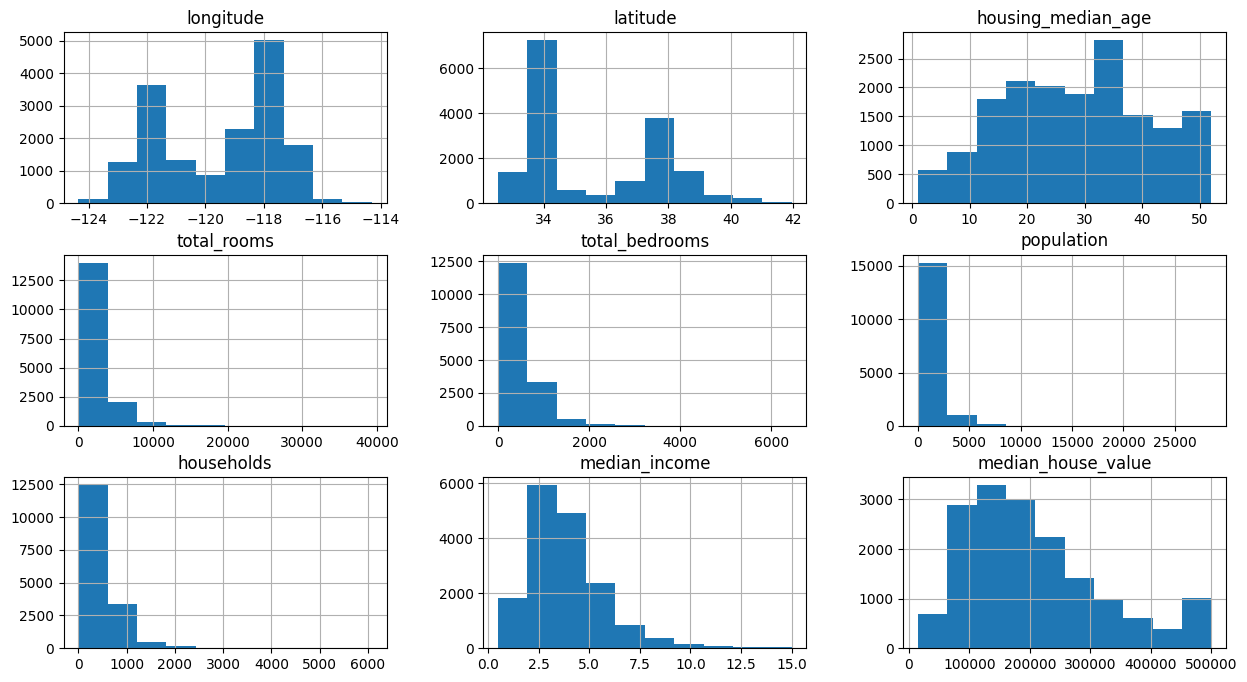

In [515]:
train_data.hist(figsize=(15,8))

In [516]:
#data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

In [517]:
numeric_data = train_data.select_dtypes(include=['number'])
numeric_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924743,-0.101962,0.041212,0.067424,0.097278,0.052207,-0.016736,-0.048738
latitude,-0.924743,1.000000,0.003988,-0.031585,-0.063957,-0.106744,-0.067646,-0.077684,-0.141146
housing_median_age,-0.101962,0.003988,1.000000,-0.360768,-0.319679,-0.299675,-0.303916,-0.118798,0.107533
total_rooms,0.041212,-0.031585,-0.360768,1.000000,0.925192,0.861205,0.917450,0.204226,0.135410
total_bedrooms,0.067424,-0.063957,-0.319679,0.925192,1.000000,0.877679,0.973119,-0.003822,0.049292
population,0.097278,-0.106744,-0.299675,0.861205,0.877679,1.000000,0.912308,0.011072,-0.022417
households,0.052207,-0.067646,-0.303916,0.917450,0.973119,0.912308,1.000000,0.018376,0.067146
median_income,-0.016736,-0.077684,-0.118798,0.204226,-0.003822,0.011072,0.018376,1.000000,0.684880
median_house_value,-0.048738,-0.141146,0.107533,0.135410,0.049292,-0.022417,0.067146,0.684880,1.000000


<Axes: >

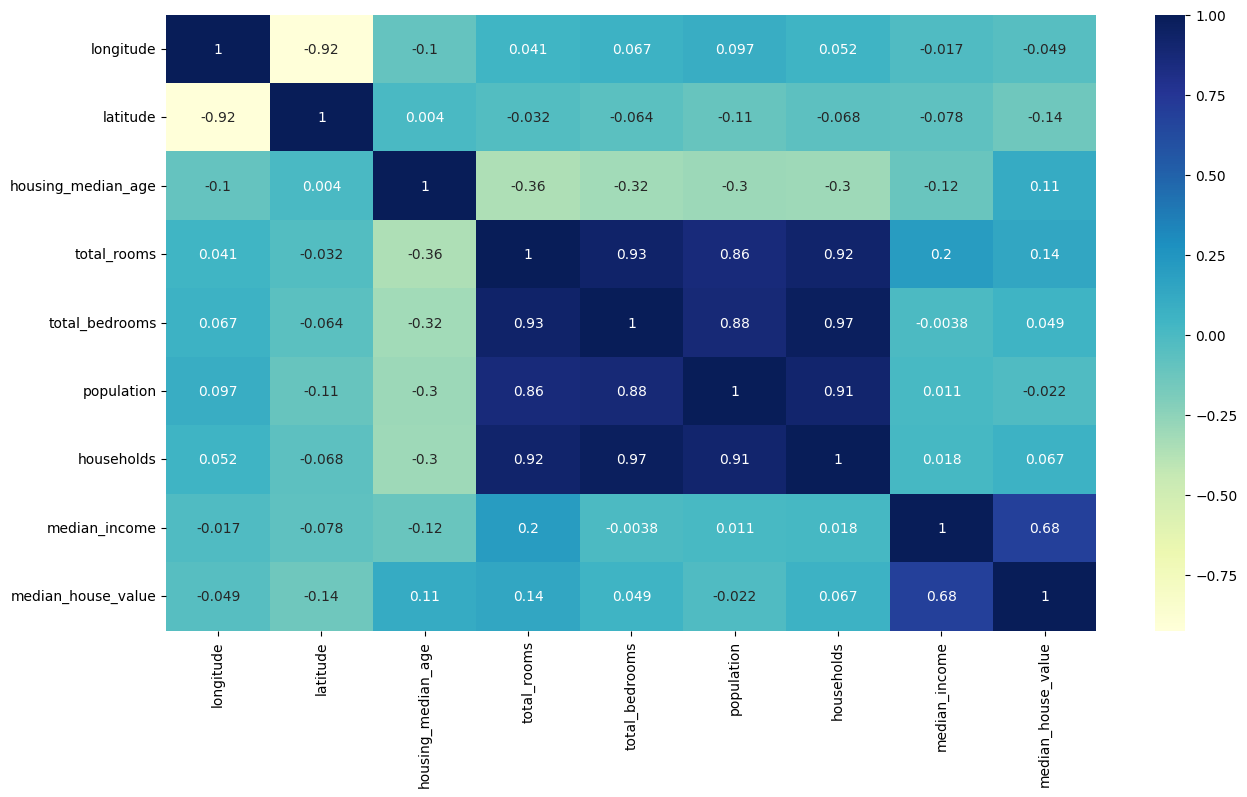

In [518]:
plt.figure(figsize=(15,8)) # heatmap used to visualize corellation metrix
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")

In [519]:
train_data['total_rooms'] = nm.log(train_data['total_rooms'] + 1)
# log transformation is used to reduce skewness of the data
# used done + 1 so that any valuewhich is neg. is become +ve becs log is undefined in negative

train_data['households'] = nm.log(train_data['households'] + 1)
train_data['total_bedrooms'] = nm.log(train_data['total_bedrooms'] + 1)
train_data['population'] = nm.log(train_data['population'] + 1)


In [520]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13167,-121.37,36.83,14.0,8.204945,6.418365,7.576610,6.398595,4.7600,INLAND,216000.0
1758,-122.33,37.94,45.0,7.112327,5.634790,6.381816,5.564520,2.8833,NEAR BAY,140400.0
10499,-117.67,33.51,19.0,7.138073,5.509388,6.302619,5.429346,2.9762,<1H OCEAN,184400.0
13241,-117.66,34.13,19.0,8.293049,6.318968,7.329094,6.234411,6.0750,INLAND,254100.0
14324,-117.15,32.72,52.0,5.843544,5.181784,6.133398,4.997212,1.2292,NEAR OCEAN,137500.0
...,...,...,...,...,...,...,...,...,...,...
8564,-118.42,33.92,25.0,8.166784,6.748760,7.329750,6.639876,3.8086,<1H OCEAN,361300.0
2042,-119.69,36.74,23.0,7.648740,5.955837,6.815640,6.006353,3.5128,INLAND,121600.0
16942,-122.31,37.56,52.0,7.763021,6.204558,7.027315,6.180017,3.9688,NEAR OCEAN,356900.0
2095,-119.76,36.75,35.0,7.382746,5.950643,7.249926,5.948035,2.1900,INLAND,53400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

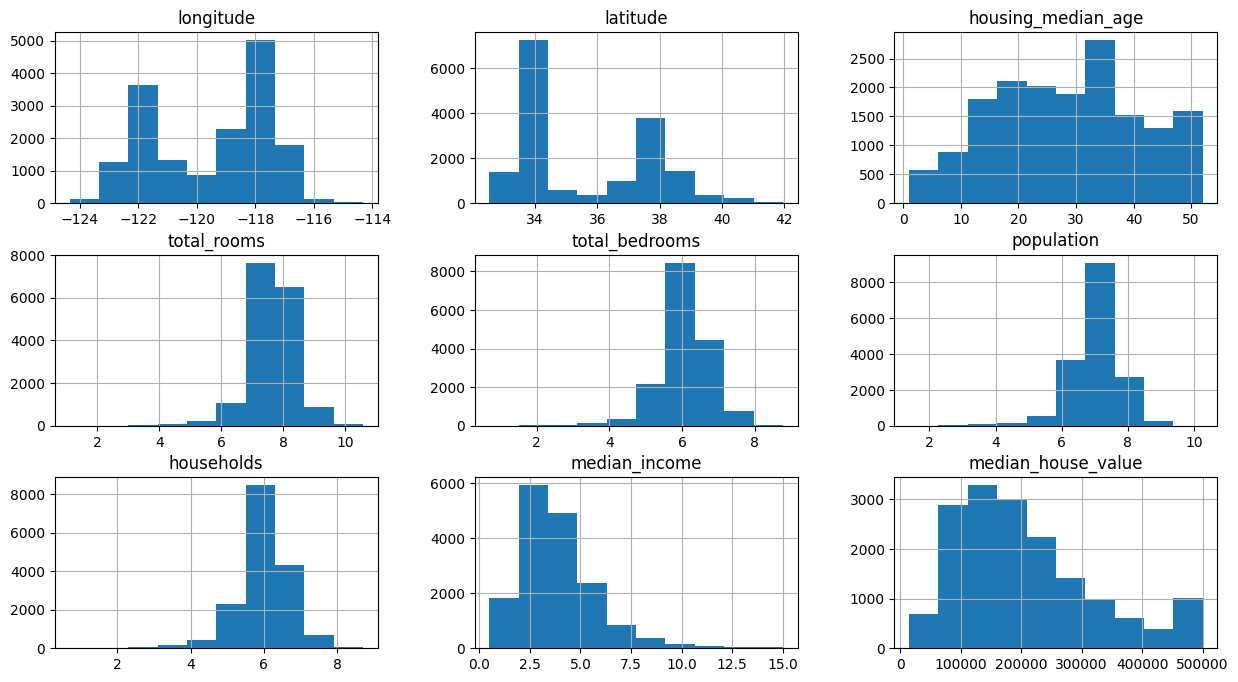

In [521]:
train_data.hist(figsize=(15, 8))

In [522]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7296
INLAND        5252
NEAR OCEAN    2137
NEAR BAY      1824
ISLAND           3
Name: count, dtype: int64

In [523]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis = 1)

<Axes: >

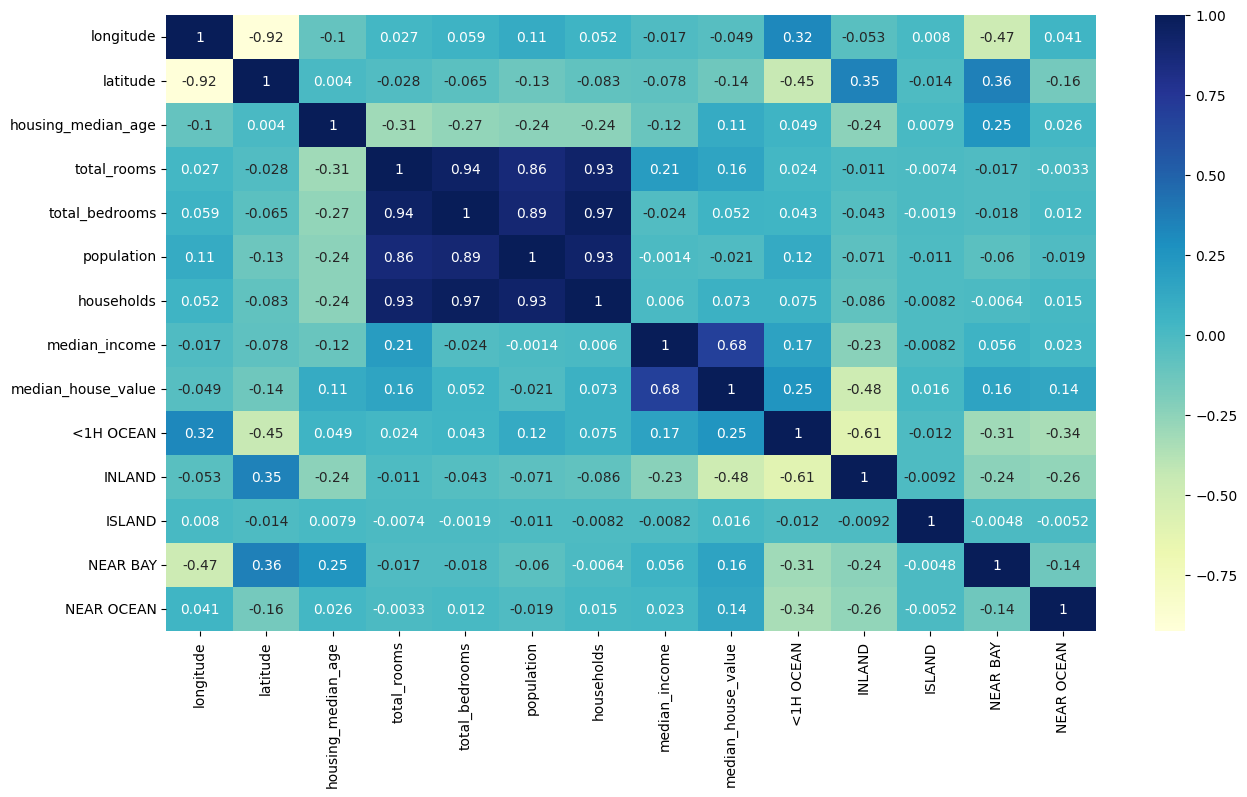

In [524]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

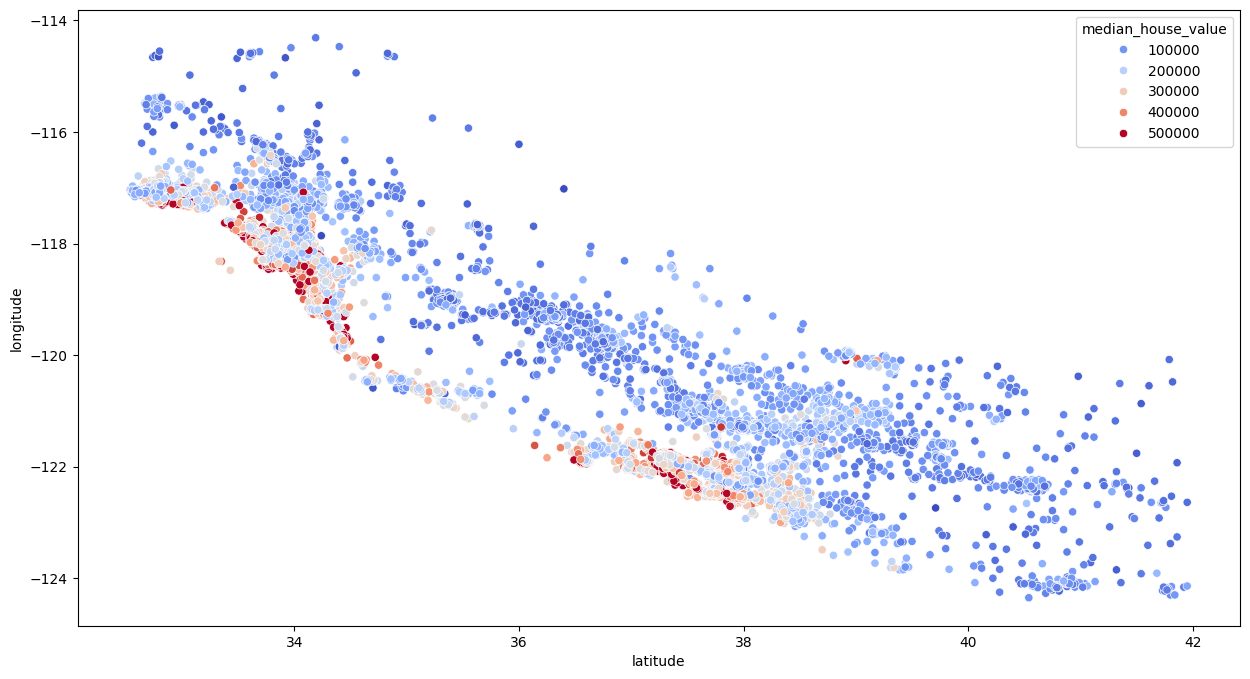

In [525]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude",data=train_data, hue="median_house_value", palette="coolwarm")

In [526]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

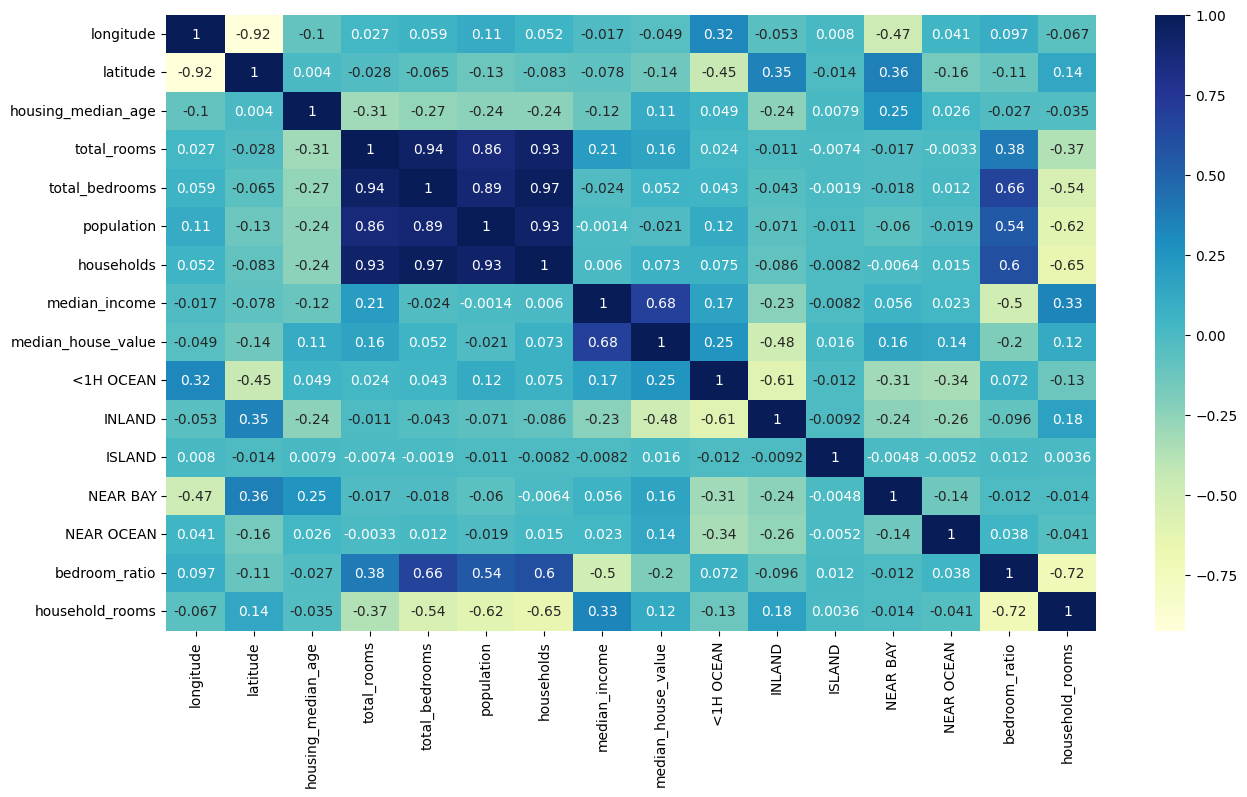

In [527]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [528]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
reg = LinearRegression()

In [529]:
X_train, y_train = train_data.drop(columns=['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit(X_train)

In [530]:
X_train_s

StandardScaler()

In [531]:
reg.fit(X_train, y_train)

LinearRegression()

In [532]:
test_data = X_test.join(y_test)

In [533]:
test_data['total_rooms'] = nm.log(test_data['total_rooms'] + 1)
test_data['households'] = nm.log(test_data['households'] + 1)
test_data['total_bedrooms'] = nm.log(test_data['total_bedrooms'] + 1)
test_data['population'] = nm.log(test_data['population'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

X_test, y_test = test_data.drop(columns=['median_house_value'], axis=1), test_data['median_house_value']

In [534]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1737,-122.33,37.97,19.0,8.547140,7.197435,7.843456,7.061334,3.3125,158800.0,False,False,False,True,False,0.842087,1.210414
6124,-117.90,34.11,23.0,8.471568,7.183112,8.475954,7.080026,2.1667,142600.0,True,False,False,False,False,0.847908,1.196545
8165,-118.13,33.80,36.0,6.934397,5.209486,6.226537,5.176150,4.3438,233600.0,True,False,False,False,False,0.751253,1.339682
14089,-117.11,32.76,31.0,7.738052,6.309918,7.011214,6.324359,3.3854,204400.0,False,False,False,False,True,0.815440,1.223531
2886,-118.98,35.38,28.0,7.066467,5.703782,7.085064,5.613128,0.8639,49400.0,False,True,False,False,False,0.807162,1.258918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,-118.14,33.97,36.0,7.249926,5.955837,7.475339,5.860786,2.6364,150000.0,True,False,False,False,False,0.821503,1.237023
1402,-122.08,37.95,24.0,8.062748,6.308098,7.209340,6.285998,5.0672,243000.0,False,False,False,True,False,0.782376,1.282652
19954,-119.33,36.21,38.0,8.044305,6.434547,7.122060,6.408529,2.6083,67000.0,False,True,False,False,False,0.799888,1.255250
18650,-121.96,36.88,37.0,7.954021,6.317165,6.845880,6.073045,4.7468,294400.0,False,False,False,False,True,0.794210,1.309725


In [535]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
13167,-121.37,36.83,14.0,8.204945,6.418365,7.576610,6.398595,4.7600,216000.0,False,True,False,False,False,0.782256,1.282304
1758,-122.33,37.94,45.0,7.112327,5.634790,6.381816,5.564520,2.8833,140400.0,False,False,False,True,False,0.792257,1.278156
10499,-117.67,33.51,19.0,7.138073,5.509388,6.302619,5.429346,2.9762,184400.0,True,False,False,False,False,0.771831,1.314721
13241,-117.66,34.13,19.0,8.293049,6.318968,7.329094,6.234411,6.0750,254100.0,False,True,False,False,False,0.761960,1.330206
14324,-117.15,32.72,52.0,5.843544,5.181784,6.133398,4.997212,1.2292,137500.0,False,False,False,False,True,0.886754,1.169361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8564,-118.42,33.92,25.0,8.166784,6.748760,7.329750,6.639876,3.8086,361300.0,True,False,False,False,False,0.826367,1.229960
2042,-119.69,36.74,23.0,7.648740,5.955837,6.815640,6.006353,3.5128,121600.0,False,True,False,False,False,0.778669,1.273442
16942,-122.31,37.56,52.0,7.763021,6.204558,7.027315,6.180017,3.9688,356900.0,False,False,False,False,True,0.799245,1.256149
2095,-119.76,36.75,35.0,7.382746,5.950643,7.249926,5.948035,2.1900,53400.0,False,True,False,False,False,0.806020,1.241208


In [536]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1737,-122.33,37.97,19.0,8.547140,7.197435,7.843456,7.061334,3.3125,False,False,False,True,False,0.842087,1.210414
6124,-117.90,34.11,23.0,8.471568,7.183112,8.475954,7.080026,2.1667,True,False,False,False,False,0.847908,1.196545
8165,-118.13,33.80,36.0,6.934397,5.209486,6.226537,5.176150,4.3438,True,False,False,False,False,0.751253,1.339682
14089,-117.11,32.76,31.0,7.738052,6.309918,7.011214,6.324359,3.3854,False,False,False,False,True,0.815440,1.223531
2886,-118.98,35.38,28.0,7.066467,5.703782,7.085064,5.613128,0.8639,False,True,False,False,False,0.807162,1.258918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,-118.14,33.97,36.0,7.249926,5.955837,7.475339,5.860786,2.6364,True,False,False,False,False,0.821503,1.237023
1402,-122.08,37.95,24.0,8.062748,6.308098,7.209340,6.285998,5.0672,False,False,False,True,False,0.782376,1.282652
19954,-119.33,36.21,38.0,8.044305,6.434547,7.122060,6.408529,2.6083,False,True,False,False,False,0.799888,1.255250
18650,-121.96,36.88,37.0,7.954021,6.317165,6.845880,6.073045,4.7468,False,False,False,False,True,0.794210,1.309725


In [537]:
X_test_s = scaler.transform(X_test)

In [538]:
reg.score(X_test, y_test)


0.6851602519248818

In [539]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [540]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [541]:
forest.score(X_test,y_test)

0.8271086897501053

In [542]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators": [100,200,300],
    "max_features": [2,4],
    "min_samples_split":[None,4,8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5,scoring="neg_mean_squared_error",
return_train_score=True)

grid_search.fit(X_train, y_train)

C:\Users\ajsad\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ajsad\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ajsad\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\ajsad\AppData\Roaming\Python\

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4],
                         'min_samples_split': [None, 4, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [543]:
best_force = grid_search.best_estimator_

In [544]:
best_force.score(X_test,y_test)

0.8245495411695108

In [545]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [546]:
input_data = [[
    -121.0,     # longitude
    37.5,       # latitude
    30,         # housing_median_age
    1500,       # total_rooms
    300,        # total_bedrooms
    800,        # population
    250,        # households
    5.2,        # median_income
    0, 0, 0, 1, 0,  # <1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN
    0.2,        # bedroom_ratio
    6.0         # household_rooms
]]

In [547]:
columns = [
    "longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
    "population", "households", "median_income", 
    "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN",
    "bedroom_ratio", "household_rooms"
]


In [548]:

# Create DataFrame for prediction
input_data = pd.DataFrame(input_data, columns=columns)

In [549]:
predicted_price = reg.predict(input_data)
print("Predicted House Price:", predicted_price[0])

Predicted House Price: -117218054.7934432
